<br></br>

<p style="font-family: Arial; font-size:3em; color:red; text-align: center">
    <strong>
        Predicting The Type & Location Of a New Venue
    </strong>
</p>

<br></br>
<p style="font-family: Arial; font-size:3em; padding=0.1em color:black; text-align: center">
    <em>
         Piotr Zubrzycki
    </em>
</p>

<br></br>
<p style="font-family: Arial; font-size:2em; padding=0.1em color:black; text-align: center">
    <em>
         January 11, 2020
    </em>
</p>
<br></br>

<br></br>
<p style="font-family: Arial; font-size:2.5em; padding=0em color:black; text-align: left">
    <strong>
         1. Introduction/Business Problem
    </strong>
</p>

<br></br>
<p style="font-family: Arial; font-size:2em; padding=0em color:black; text-align: left">
    <em>
         1.1 Background
    </em>
</p>

<p style="font-family: Arial; font-size:1.5em; padding=0.1em color:black; text-align: justify">
    <em>
         Decision what type of place to open, and where it should be located, is crucial when preparing business plan for a new project. It is hard to keep track and understand which places have the biggest financial potential. Each year new or different businesses might be more popular than the others. Without proper analysis of the trends over the years, it is almost impossible to be sure that some particular type of venue is potentially more profitable than the others. It is also extremely important to know, where the new venue, which we would like to invest in, should be located. Because it is impossible to have an access to the financial records of each venue, it could be assumed that the number of visitors at some particular place (popularity) corresponds to the income. Also by utilization of location data, the optimal area in reference to city centre and main train station could be chosen.
    </em>
</p>
<br></br>

<p style="font-family: Arial; font-size:2em; padding=0em color:black; text-align: left">
    <em>
         1.2 Problem
    </em>
</p>

<p style="font-family: Arial; font-size:1.5em; padding=0.1em color:black; text-align: justify">
    <em>
         Data that might contribute to determine what business should be opened, in the particular city, based on number of citizens, might include number of visitors and its location in reference to the city centre and main train station.
This project aims to predict what type of venue investor should invest in. 
    </em>
</p>
<br></br>

<p style="font-family: Arial; font-size:2em; padding=0em color:black; text-align: left">
    <em>
         1.3 Interest
    </em>
</p>

<p style="font-family: Arial; font-size:1.5em; padding=0.1em color:black; text-align: justify">
    <em>
         Everyone who thinks about investing into new venue, would be highly interested to see, what types of places are the most popular/profitable, and what is their ideal location.
    </em>
</p>
<br></br>

<br></br>
<p style="font-family: Arial; font-size:2.5em; padding=0em color:black; text-align: left">
    <strong>
         2. Data acquisition
    </strong>
</p>

<br></br>
<p style="font-family: Arial; font-size:2em; padding=0em color:black; text-align: left">
    <em>
         2.1 Data sources
    </em>
</p>

<p style="font-family: Arial; font-size:1.5em; padding=0.1em color:black; text-align: justify">
    <em>
         In different cities different venue types might be popular. This is why, in order to predict what is the best investment in the city of our interest, cities with simian size/population will be chosen for statistical analysis. Information about their population, is extracted from <a href="https://simplemaps.com/data/world-cities">simplemaps.com</a> (worldcities.csv).
Because this file does not include data about size of the cities, it will be assumed that size correlates with population.
Next the most popular venues will be selected based on their popularity. Such information can be extracted from <a href="https://foursquare.com">foursquare.com</a>. Additionally the optimal location will also be chosen based on the coordinates.
This test will be run for several years in order to see what is the trend of the most popular venues.  
    </em>
</p>
<br></br>

<p style="font-family: Arial; font-size:2em; padding=0em color:black; text-align: left">
    <em>
         2.2 Data examples
    </em>
</p>

<p style="font-family: Arial; font-size:1.5em; padding=0.1em color:black; text-align: justify">
    <em>
         Population of the cities <br><br> Reading "worldcities.csv"
    </em>
</p>
<br></br>

In [1]:
# The code was removed by Watson Studio for sharing.

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
0,Tokyo,Tokyo,35.6897,139.6922,Japan,JP,JPN,Tōkyō,primary,37977000.0,1392685764
1,Jakarta,Jakarta,-6.2146,106.8451,Indonesia,ID,IDN,Jakarta,primary,34540000.0,1360771077
2,Delhi,Delhi,28.6600,77.2300,India,IN,IND,Delhi,admin,29617000.0,1356872604
3,Mumbai,Mumbai,18.9667,72.8333,India,IN,IND,Mahārāshtra,admin,23355000.0,1356226629
4,Manila,Manila,14.5958,120.9772,Philippines,PH,PHL,Manila,primary,23088000.0,1608618140


<br></br>
<p style="font-family: Arial; font-size:1.5em; padding=0.1em color:black; text-align: justify">
    <em>
         Selecting city we woul dlike to invest in
    </em>
</p>
<br></br>

In [2]:
# City name in ASCII format
city_name = "Krakow"

<br></br>
<p style="font-family: Arial; font-size:1.5em; padding=0.1em color:black; text-align: justify">
    <em>
         Finding cities with similar population
    </em>
</p>
<br></br>

In [3]:
# Sorting pd_city_population dataframe by "population" - descending 
df_city_population.sort_values(by=['population'], ascending=False, inplace=True)
df_city_population.reset_index(inplace=True)  # reseting index
df_city_population.drop(['index'], axis = 1, inplace=True) # dropping "index" column created during "reset_index"
df_city_population.head()

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
0,Tokyo,Tokyo,35.6897,139.6922,Japan,JP,JPN,Tōkyō,primary,37977000.0,1392685764
1,Jakarta,Jakarta,-6.2146,106.8451,Indonesia,ID,IDN,Jakarta,primary,34540000.0,1360771077
2,Delhi,Delhi,28.6600,77.2300,India,IN,IND,Delhi,admin,29617000.0,1356872604
3,Mumbai,Mumbai,18.9667,72.8333,India,IN,IND,Mahārāshtra,admin,23355000.0,1356226629
4,Manila,Manila,14.5958,120.9772,Philippines,PH,PHL,Manila,primary,23088000.0,1608618140


In [4]:
# Checking if 'worldcities.csv' file contains information about searched city
if city_name in list(df_city_population['city_ascii']):
    print('Searched city "{}" exists in "worldcities.csv" file'.format(city_name))
    print(df_city_population.loc[df_city_population['city_ascii'] == city_name])
else:
    print('Searched city "{}" does not exist in "worldcities.csv" file!'.format(city_name))

Searched city "Krakow" exists in "worldcities.csv" file
       city city_ascii      lat      lng country iso2 iso3   admin_name  \
886  Kraków     Krakow  50.0614  19.9372  Poland   PL  POL  Małopolskie   

    capital  population          id  
886   admin    766739.0  1616172264  


In [5]:
# Keeping cities only from the same region/country - selecting countries from other continetns could bias our analysis 
# Thus in our case we will limit cities used for analysis to the same country 
# Country of the selected city "city_name" - could also be done per continent
country = df_city_population[df_city_population['city_ascii'] == city_name]['country']
country = list(country)[0]
df_city_population = df_city_population[df_city_population['country'] == country]
df_city_population.reset_index(inplace=True)  # reseting index
df_city_population.drop(['index'], axis = 1, inplace=True) # dropping "index" column created during "reset_index"


# finding an index of the searched city
city_name_index = df_city_population[df_city_population['city_ascii'] == city_name].index[0]
print('Index of {} is: {}'.format(city_name, city_name_index))

# Finding cities with similar population to the "city_name"
# Number of cities used for analysis is defined by "number_of_cities" paramter 
number_of_cities = 21

max_index = len(list(df_city_population['city_ascii'])) - 1
# Finding idex range of the cities which will be used for analysis
if int(number_of_cities / 2) == number_of_cities / 2:
    lower_index = city_name_index - int(number_of_cities / 2)
    higher_index = city_name_index + int(number_of_cities / 2)
    if lower_index < 0:      
        higher_index = city_name_index + int(number_of_cities / 2) + (abs(lower_index))
        lower_index = 0
    if higher_index > max_index:
        lower_index = city_name_index - int(number_of_cities / 2) - abs(higher_index - max_index)
        higher_index = max_index      
else:
    lower_index = city_name_index - (int(number_of_cities / 2) + 1)
    higher_index = city_name_index + int(number_of_cities / 2)
    if lower_index < 0:      
        higher_index = city_name_index + int(number_of_cities / 2) + (abs(lower_index))
        lower_index = 0
    if higher_index > max_index:
        lower_index = city_name_index - int(number_of_cities / 2) - abs(higher_index - max_index)
        higher_index = max_index
        
print('Index range of cities used for analysis: {}-{}'.format(lower_index, higher_index))


# Print city name, and location of the cities used for analysis
df_cities_for_analysis = df_city_population.loc[lower_index : higher_index][['city_ascii', 'population', 'lat', 'lng']]
df_cities_for_analysis.reset_index(inplace=True)  # reseting index
df_cities_for_analysis.drop(['index'], axis = 1, inplace=True) # dropping "index" column created during "reset_index"
city_name_index = df_cities_for_analysis[df_cities_for_analysis['city_ascii'] == city_name].index[0]
df_cities_for_analysis.drop(df_cities_for_analysis.index[city_name_index], inplace=True)
df_cities_for_analysis.reset_index(inplace=True)  # reseting index
df_cities_for_analysis.drop(['index'], axis = 1, inplace=True) # dropping "index" column created during "reset_index"
df_cities_for_analysis

Index of Krakow is: 1
Index range of cities used for analysis: 0-21


,city_ascii,population,lat,lng
0,Warsaw,1790658.0,52.2167,21.0333
1,Lodz,690422.0,51.7769,19.4547
2,Wroclaw,638586.0,51.1077,17.0353
3,Poznan,538633.0,52.4000,16.9167
4,Gdansk,464254.0,54.3667,18.6333
5,Szczecin,403833.0,53.4247,14.5553
6,Bydgoszcz,358614.0,53.1167,18.0000
7,Lublin,339850.0,51.2333,22.5667
8,Bialystok,297288.0,53.1167,23.1667
9,Katowice,276499.0,50.2500,19.0000


In [6]:
# Installing flolium in order to depict locations of the cities used for analysis
import sys
!{sys.executable} -m pip install folium

     |████████████████████████████████| 94 kB 4.1 MB/s  eta 0:00:01


In [7]:
import folium

In [8]:
# create map of Toronto using latitude and longitude values
latitude_starting_zone = df_city_population.loc[df_city_population['city_ascii'] == city_name]['lat']
longitude_starting_zone = df_city_population.loc[df_city_population['city_ascii'] == city_name]['lng']
cities_for_analysis_map = folium.Map(location=[latitude_starting_zone, longitude_starting_zone], zoom_start=5)


# add markers to map - cities used for analyses
for i in range(0, len(df_cities_for_analysis['city_ascii'])):
    label = "{}".format(df_cities_for_analysis['city_ascii'][i])
    # folium label can't hadnmle '`' mark. Needs to be replaced
    if '`' in label:
        label = label.replace("`", "'")
    #print(label) 
    label = folium.Popup(label)
    folium.CircleMarker(
        [df_cities_for_analysis['lat'][i], df_cities_for_analysis['lng'][i]],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(cities_for_analysis_map) 


# add markers to map - city_name (city where we are going to invest)
label = folium.Popup(city_name)
folium.CircleMarker(
    [latitude_starting_zone, longitude_starting_zone],
    radius=5,
    popup=label,
    color='red',
    fill=True,
    fill_color='#ff0000',
    fill_opacity=0.7,
    parse_html=False).add_to(cities_for_analysis_map)
    
cities_for_analysis_map

<br></br>
<p style="font-family: Arial; font-size:1.5em; padding=0.1em color:black; text-align: justify">
    <em>
        <strong>
         This test was originaly performed on the data from cities arround the worldd. Unformatunatelly most of the data from "analysis cities" come from Asia/China what potentially could bias the result significantly. Thus decision was made to limit cities to the same country (alternativelly test could be conducted for the cities from the same region/continent).
        </strong>
    </em>
</p>
<br></br>

<br></br>
<p style="font-family: Arial; font-size:1.5em; padding=0.1em color:black; text-align: justify">
    <em>
         Checking what are the most popular venues in selected Cities
    </em>
</p>
<br></br>

<br></br>
<p style="font-family: Arial; font-size:1.5em; padding=0.1em color:black; text-align: justify">
    <em>
        Next, Foursquare API to explore the cities and segment them, will be utilised <br><br>
        Define Foursquare Credentials and Version
    </em>
</p>
<br></br>

In [9]:
# The code was removed by Watson Studio for sharing.

<br></br>
<p style="font-family: Arial; font-size:1.5em; padding=0.1em color:black; text-align: justify">
    <em>
        Create a function to get the most popular Venues in some predefined radius
    </em>
</p>
<br></br>

In [10]:
import requests

def getNearbyVenues(names, latitudes, longitudes, radius=5000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):   
        #print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
        
        #print(url)
        # make the GET request
        try:
            results = requests.get(url).json()["response"]["groups"][0]["items"]
        except:
            print('Data for city {} & date {} not found in foursqare.com database'.format(name, VERSION))
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name'],
            VERSION) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['City Name', 
                  'City Latitude', 
                  'City Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category',
                  'Date']
    
    return(nearby_venues)

<br></br>
<p style="font-family: Arial; font-size:1.5em; padding=0.1em color:black; text-align: justify">
    <em>
        Code to run the above function on each time period (VERSION) & city, and create a new dataframe called "df_cities_for_analysis_venues"
    </em>
</p>
<br></br>

In [11]:
# creating PandDa dataframe which will store data from all dates
column_names = ['City Name', 
                'City Latitude', 
                'City Longitude', 
                'Venue', 
                'Venue Latitude', 
                'Venue Longitude', 
                'Venue Category',
                'Date']
    
df_cities_for_analysis_venues = pd.DataFrame(columns = column_names)

# Extracting data (most popular places) from different dates - to analyze trend in time 
for VERSION in dates:
    df_cities_for_analysis_venues_per_date = getNearbyVenues(names=df_cities_for_analysis['city_ascii'],
                                   latitudes=df_cities_for_analysis['lat'],
                                   longitudes=df_cities_for_analysis['lng']
                                  )
    df_cities_for_analysis_venues = pd.concat([df_cities_for_analysis_venues, df_cities_for_analysis_venues_per_date])
    print('VERSION: {} Shape: {}'.format(VERSION, df_cities_for_analysis_venues.shape))

VERSION: 20130731 Shape: (1476, 8)
VERSION: 20131031 Shape: (2952, 8)
VERSION: 20140731 Shape: (4428, 8)
VERSION: 20141031 Shape: (5904, 8)
VERSION: 20150731 Shape: (7380, 8)
VERSION: 20151031 Shape: (8856, 8)
VERSION: 20160731 Shape: (10332, 8)
VERSION: 20161031 Shape: (11808, 8)
VERSION: 20170731 Shape: (13284, 8)
VERSION: 20171031 Shape: (14760, 8)
VERSION: 20180731 Shape: (16236, 8)
VERSION: 20181031 Shape: (17712, 8)
VERSION: 20190731 Shape: (19188, 8)
VERSION: 20191031 Shape: (20664, 8)


In [12]:
df_cities_for_analysis_venues = df_cities_for_analysis_venues.reset_index()

In [13]:
df_cities_for_analysis_venues.drop('index', axis=1, inplace=True)
df_cities_for_analysis_venues.iloc[0: 20000: 1000]

,City Name,City Latitude,City Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Date
0,Warsaw,52.2167,21.0333,Palace On The Isle (Pałac Łazienkowski (Pałac ...,52.214860,21.035599,Palace,20130731
1000,Czestochowa,50.8000,19.1167,Promenada im. Czesława Niemena,50.834128,19.119971,Park,20130731
2000,Szczecin,53.4247,14.5553,Spotkanie,53.431406,14.549465,Breakfast Spot,20131031
3000,Warsaw,52.2167,21.0333,Bookoff - Księgarnia Artystyczna,52.232870,21.002341,Bookstore,20140731
4000,Radom,51.4036,21.1567,Antalya Kebab,51.403540,21.154256,Kebab Restaurant,20140731
5000,Szczecin,53.4247,14.5553,Shell,53.425522,14.499901,Gas Station,20141031
6000,Warsaw,52.2167,21.0333,Locale,52.192363,21.003873,Italian Restaurant,20150731
7000,Torun,53.0167,18.6167,Dwór Artusa,53.009844,18.604390,History Museum,20150731
8000,Bydgoszcz,53.1167,18.0000,Holiday Inn Bydgoszcz,53.121343,18.005479,Hotel,20151031
9000,Lodz,51.7769,19.4547,Park im. A. Mickiewicza (Park Julianowski),51.799857,19.448641,Park,20160731


<br></br>
<p style="font-family: Arial; font-size:1.5em; padding=0.1em color:black; text-align: justify">
    <em>
        Let's check how many venues were returned for each city & date
    </em>
</p>
<br></br>

In [14]:
df_cities_for_analysis_venues.groupby(['City Name', 'Date']).count()

City Latitude  City Longitude  Venue  Venue Latitude  \
City Name Date                                                             
Bialystok 20130731             88              88     88              88   
          20131031             88              88     88              88   
          20140731             88              88     88              88   
          20141031             88              88     88              88   
          20150731             88              88     88              88   
...                           ...             ...    ...             ...   
Zabrze    20171031             24              24     24              24   
          20180731             24              24     24              24   
          20181031             24              24     24              24   
          20190731             24              24     24              24   
          20191031             24              24     24              24   

                    Venue Longitude  Venue Category  
City Name Date                                       
Bialystok 20130731               88              88  
          20131031               88              88  
          20140731               88              88  
          20141031               88              88  
          20150731               88              88  
...                             ...             ...  
Zabrze    20171031               24              24  
          20180731               24              24  
          20181031               24              24  
          20190731               24              24  
          20191031               24              24  

[294 rows x 6 columns]

<br></br>
<p style="font-family: Arial; font-size:1.5em; padding=0.1em color:black; text-align: justify">
    <em>
        Let's find out how many unique categories/venues there are
    </em>
</p>
<br></br>

In [15]:
print('There are {} uniques categories.'.format(len(df_cities_for_analysis_venues['Venue Category'].unique())))

There are 204 uniques categories.


<br></br>
<p style="font-family: Arial; font-size:1.5em; padding=0.1em color:black; text-align: justify">
    <em>
        Analyze Each City
    </em>
</p>
<br></br>

In [16]:
# one hot encoding
df_cities_for_analysis_venues_onehot = pd.get_dummies(df_cities_for_analysis_venues[['Venue Category']], prefix="", prefix_sep="")

# add 'city name' column back to dataframe
df_cities_for_analysis_venues_onehot['City Name'] = df_cities_for_analysis_venues['City Name'] 

# add 'Date' column back to dataframe
df_cities_for_analysis_venues_onehot['Date'] = df_cities_for_analysis_venues['Date'] 

# move 'city name' column to the first column
fixed_columns = [df_cities_for_analysis_venues_onehot.columns[-1]] + list(df_cities_for_analysis_venues_onehot.columns[:-1])
df_cities_for_analysis_venues_onehot = df_cities_for_analysis_venues_onehot[fixed_columns]

print(df_cities_for_analysis_venues_onehot.shape)
df_cities_for_analysis_venues_onehot.iloc[0: 20000: 1000]

(20664, 206)


,Date,African Restaurant,Airport,American Restaurant,Aquarium,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,...,Vietnamese Restaurant,Volleyball Court,Warehouse Store,Water Park,Waterfront,Whisky Bar,Wine Bar,Wine Shop,Zoo,City Name
0,20130731,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Warsaw
1000,20130731,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Czestochowa
2000,20131031,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Szczecin
3000,20140731,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Warsaw
4000,20140731,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Radom
5000,20141031,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Szczecin
6000,20150731,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Warsaw
7000,20150731,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Torun
8000,20151031,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Bydgoszcz
9000,20160731,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Lodz


<br></br>
<p style="font-family: Arial; font-size:1.5em; padding=0.1em color:black; text-align: justify">
    <em>
        Grouping rows by 'City Name' & 'Date' and by taking the mean of the frequency of occurrence of each category
    </em>
</p>
<br></br>

In [17]:
df_cities_for_analysis_venues_onehot_grouped = df_cities_for_analysis_venues_onehot.groupby(['City Name', 'Date']).mean().reset_index()
df_cities_for_analysis_venues_onehot_grouped

,City Name,Date,African Restaurant,Airport,American Restaurant,Aquarium,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,...,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Volleyball Court,Warehouse Store,Water Park,Waterfront,Whisky Bar,Wine Bar,Wine Shop,Zoo
0,Bialystok,20130731,0.0,0.011364,0.011364,0.0,0.0,0.0,0.0,0.0,...,0.011364,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.011364
1,Bialystok,20131031,0.0,0.011364,0.011364,0.0,0.0,0.0,0.0,0.0,...,0.011364,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.011364
2,Bialystok,20140731,0.0,0.011364,0.011364,0.0,0.0,0.0,0.0,0.0,...,0.011364,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.011364
3,Bialystok,20141031,0.0,0.011364,0.011364,0.0,0.0,0.0,0.0,0.0,...,0.011364,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.011364
4,Bialystok,20150731,0.0,0.011364,0.011364,0.0,0.0,0.0,0.0,0.0,...,0.011364,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.011364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,Zabrze,20171031,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
290,Zabrze,20180731,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
291,Zabrze,20181031,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
292,Zabrze,20190731,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


<br></br>
<p style="font-family: Arial; font-size:1.5em; padding=0.1em color:black; text-align: justify">
    <em>
        Let's print each City along with the top 5 most common venues
    </em>
</p>
<br></br>

In [18]:
num_top_venues = 5

for index, row in df_cities_for_analysis_venues_onehot_grouped.iterrows():
    city = row['City Name']
    date = row['Date']
    print('-----{} {}-----'.format(city, date))
    temp = df_cities_for_analysis_venues_onehot_grouped[(df_cities_for_analysis_venues_onehot_grouped['City Name'] == city) & (df_cities_for_analysis_venues_onehot_grouped['Date'] == date)].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[2:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

-----Bialystok 20130731-----
           venue  freq
0          Hotel  0.08
1            Pub  0.07
2     Restaurant  0.06
3  Shopping Mall  0.05
4    Pizza Place  0.05


-----Bialystok 20131031-----
           venue  freq
0          Hotel  0.08
1            Pub  0.07
2     Restaurant  0.06
3  Shopping Mall  0.05
4    Pizza Place  0.05


-----Bialystok 20140731-----
           venue  freq
0          Hotel  0.08
1            Pub  0.07
2     Restaurant  0.06
3  Shopping Mall  0.05
4    Pizza Place  0.05


-----Bialystok 20141031-----
           venue  freq
0          Hotel  0.08
1            Pub  0.07
2     Restaurant  0.06
3  Shopping Mall  0.05
4    Pizza Place  0.05


-----Bialystok 20150731-----
           venue  freq
0          Hotel  0.08
1            Pub  0.07
2     Restaurant  0.06
3  Shopping Mall  0.05
4    Pizza Place  0.05


-----Bialystok 20151031-----
           venue  freq
0          Hotel  0.08
1            Pub  0.07
2     Restaurant  0.06
3  Shopping Mall  0.05
4    Pizza 

<br></br>
<p style="font-family: Arial; font-size:1.5em; padding=0.1em color:black; text-align: justify">
    <em>
        Let's put that into a pandas dataframe <br><br>
        First, let's write a function to sort the venues in descending order
    </em>
</p>
<br></br>

In [19]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[2:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

<br></br>
<p style="font-family: Arial; font-size:1.5em; padding=0.1em color:black; text-align: justify">
    <em>
        Now let's create the new dataframe and display the top 10 venues for each City
    </em>
</p>
<br></br>

In [20]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['City Name', 'Date']
for i in range(0, num_top_venues):
    if i < 3:
        columns.append('{}{} Most Common Venue'.format(i+1, indicators[i]))
    else:
         columns.append('{}th Most Common Venue'.format(i+1))

        
# create a new dataframe
df_cities_for_analysis_venues_onehot_grouped_sorted = pd.DataFrame(columns=columns)
df_cities_for_analysis_venues_onehot_grouped_sorted[['City Name', 'Date']] = df_cities_for_analysis_venues_onehot_grouped[['City Name', 'Date']]

for i in range(0, df_cities_for_analysis_venues_onehot_grouped.shape[0]):
    df_cities_for_analysis_venues_onehot_grouped_sorted.iloc[i, 2:] = return_most_common_venues(df_cities_for_analysis_venues_onehot_grouped.iloc[i, :], num_top_venues)

df_cities_for_analysis_venues_onehot_grouped_sorted

,City Name,Date,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Bialystok,20130731,Hotel,Pub,Restaurant,Pizza Place,Shopping Mall,Coffee Shop,Grocery Store,Fast Food Restaurant,Sushi Restaurant,Sandwich Place
1,Bialystok,20131031,Hotel,Pub,Restaurant,Pizza Place,Shopping Mall,Coffee Shop,Grocery Store,Fast Food Restaurant,Sushi Restaurant,Sandwich Place
2,Bialystok,20140731,Hotel,Pub,Restaurant,Pizza Place,Shopping Mall,Coffee Shop,Grocery Store,Fast Food Restaurant,Sushi Restaurant,Sandwich Place
3,Bialystok,20141031,Hotel,Pub,Restaurant,Pizza Place,Shopping Mall,Coffee Shop,Grocery Store,Fast Food Restaurant,Sushi Restaurant,Sandwich Place
4,Bialystok,20150731,Hotel,Pub,Restaurant,Pizza Place,Shopping Mall,Coffee Shop,Grocery Store,Fast Food Restaurant,Sushi Restaurant,Sandwich Place
...,...,...,...,...,...,...,...,...,...,...,...,...
289,Zabrze,20171031,Shopping Mall,Fast Food Restaurant,Gas Station,Hotel,Supermarket,History Museum,Polish Restaurant,Concert Hall,Clothing Store,Creperie
290,Zabrze,20180731,Shopping Mall,Fast Food Restaurant,Gas Station,Hotel,Supermarket,History Museum,Polish Restaurant,Concert Hall,Clothing Store,Creperie
291,Zabrze,20181031,Shopping Mall,Fast Food Restaurant,Gas Station,Hotel,Supermarket,History Museum,Polish Restaurant,Concert Hall,Clothing Store,Creperie
292,Zabrze,20190731,Shopping Mall,Fast Food Restaurant,Gas Station,Hotel,Supermarket,History Museum,Polish Restaurant,Concert Hall,Clothing Store,Creperie


<br></br>
<p style="font-family: Arial; font-size:2.5em; padding=0em color:black; text-align: left">
    <strong>
         3. Data Analysis
    </strong>
</p>

<p style="font-family: Arial; font-size:1.5em; padding=0.1em color:black; text-align: justify">
    <em>
        Main issue with extracted data from <a href="https://foursquare.com">foursquare.com</a> 
        is that they do not consist of number of "check ins" into particular venue (I can't see such information in json file). It significantly limits whole analysis. Because we do not have this data, it will be assumed, that most viable option from the business perspective, will correlate with the venue which statistically occurs the most in analysed cities.
    </em>
</p>
<br></br>

<p style="font-family: Arial; font-size:2em; padding=0em color:black; text-align: left">
    <em>
         3.1 Data Manipulation
    </em>
</p>

<br></br>
<p style="font-family: Arial; font-size:1.5em; padding=0.1em color:black; text-align: justify">
    <em>
        Checking what are statistically the most popular venues, in all analysed cities, for each 'Date'<br><br>
        This way we can see, how trend changes over time
    </em>
</p>
<br></br>

In [21]:
df_cities_for_analysis_venues_onehot_grouped_date = df_cities_for_analysis_venues_onehot.groupby('Date').mean().reset_index()
df_cities_for_analysis_venues_onehot_grouped_date

,Date,African Restaurant,Airport,American Restaurant,Aquarium,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,...,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Volleyball Court,Warehouse Store,Water Park,Waterfront,Whisky Bar,Wine Bar,Wine Shop,Zoo
0,20130731,0.000678,0.00271,0.002033,0.000678,0.001355,0.00542,0.001355,0.000678,0.002033,...,0.01355,0.001355,0.000678,0.000678,0.001355,0.001355,0.001355,0.001355,0.000678,0.002033
1,20131031,0.000678,0.00271,0.002033,0.000678,0.001355,0.00542,0.001355,0.000678,0.002033,...,0.01355,0.001355,0.000678,0.000678,0.001355,0.001355,0.001355,0.001355,0.000678,0.002033
2,20140731,0.000678,0.00271,0.002033,0.000678,0.001355,0.00542,0.001355,0.000678,0.002033,...,0.01355,0.001355,0.000678,0.000678,0.001355,0.001355,0.001355,0.001355,0.000678,0.002033
3,20141031,0.000678,0.00271,0.002033,0.000678,0.001355,0.00542,0.001355,0.000678,0.002033,...,0.01355,0.001355,0.000678,0.000678,0.001355,0.001355,0.001355,0.001355,0.000678,0.002033
4,20150731,0.000678,0.00271,0.002033,0.000678,0.001355,0.00542,0.001355,0.000678,0.002033,...,0.01355,0.001355,0.000678,0.000678,0.001355,0.001355,0.001355,0.001355,0.000678,0.002033
5,20151031,0.000678,0.00271,0.002033,0.000678,0.001355,0.00542,0.001355,0.000678,0.002033,...,0.01355,0.001355,0.000678,0.000678,0.001355,0.001355,0.001355,0.001355,0.000678,0.002033
6,20160731,0.000678,0.00271,0.002033,0.000678,0.001355,0.00542,0.001355,0.000678,0.002033,...,0.01355,0.001355,0.000678,0.000678,0.001355,0.001355,0.001355,0.001355,0.000678,0.002033
7,20161031,0.000678,0.00271,0.002033,0.000678,0.001355,0.00542,0.001355,0.000678,0.002033,...,0.01355,0.001355,0.000678,0.000678,0.001355,0.001355,0.001355,0.001355,0.000678,0.002033
8,20170731,0.000678,0.00271,0.002033,0.000678,0.001355,0.00542,0.001355,0.000678,0.002033,...,0.01355,0.001355,0.000678,0.000678,0.001355,0.001355,0.001355,0.001355,0.000678,0.002033
9,20171031,0.000678,0.00271,0.002033,0.000678,0.001355,0.00542,0.001355,0.000678,0.002033,...,0.01355,0.001355,0.000678,0.000678,0.001355,0.001355,0.001355,0.001355,0.000678,0.002033


In [22]:
num_top_venues = 5

for index, row in df_cities_for_analysis_venues_onehot_grouped_date.iterrows():
    date = row['Date']
    print('-----{}-----'.format(date))
    temp = df_cities_for_analysis_venues_onehot_grouped_date[df_cities_for_analysis_venues_onehot_grouped_date['Date'] == date].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[2:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

-----20130731-----
                  venue  freq
0                  Café  0.07
1                 Hotel  0.06
2  Fast Food Restaurant  0.03
3    Italian Restaurant  0.03
4                   Pub  0.03


-----20131031-----
                  venue  freq
0                  Café  0.07
1                 Hotel  0.06
2  Fast Food Restaurant  0.03
3    Italian Restaurant  0.03
4                   Pub  0.03


-----20140731-----
                  venue  freq
0                  Café  0.07
1                 Hotel  0.06
2  Fast Food Restaurant  0.03
3    Italian Restaurant  0.03
4                   Pub  0.03


-----20141031-----
                  venue  freq
0                  Café  0.07
1                 Hotel  0.06
2  Fast Food Restaurant  0.03
3    Italian Restaurant  0.03
4                   Pub  0.03


-----20150731-----
                  venue  freq
0                  Café  0.07
1                 Hotel  0.06
2  Fast Food Restaurant  0.03
3    Italian Restaurant  0.03
4                   Pub  0.

<br></br>
<p style="font-family: Arial; font-size:1.5em; padding=0.1em color:black; text-align: justify">
    <em>
        Function to sort the venues grouped by date in descending order 
    </em>
</p>
<br></br>

In [23]:
def return_most_common_venues_date(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

<br></br>
<p style="font-family: Arial; font-size:1.5em; padding=0.1em color:black; text-align: justify">
    <em>
        Now let's create the new dataframe and display the top 10 venues for each Date
    </em>
</p>
<br></br>

In [24]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Date']
for i in range(0, num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(i+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(i+1))
        
# create a new dataframe
df_cities_for_analysis_venues_onehot_grouped_date_sorted = pd.DataFrame(columns=columns)
df_cities_for_analysis_venues_onehot_grouped_date_sorted[['Date']] = df_cities_for_analysis_venues_onehot_grouped_date[['Date']]

for i in range(0, df_cities_for_analysis_venues_onehot_grouped_date.shape[0]):
    df_cities_for_analysis_venues_onehot_grouped_date_sorted.iloc[i, 1:] = return_most_common_venues_date(df_cities_for_analysis_venues_onehot_grouped_date.iloc[i, :], num_top_venues)

df_cities_for_analysis_venues_onehot_grouped_date_sorted

,Date,1th Most Common Venue,2th Most Common Venue,3th Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,20130731,Café,Hotel,Restaurant,Park,Fast Food Restaurant,Pizza Place,Coffee Shop,Shopping Mall,Pub,Plaza
1,20131031,Café,Hotel,Restaurant,Park,Fast Food Restaurant,Pizza Place,Coffee Shop,Shopping Mall,Pub,Plaza
2,20140731,Café,Hotel,Restaurant,Park,Fast Food Restaurant,Pizza Place,Coffee Shop,Shopping Mall,Pub,Plaza
3,20141031,Café,Hotel,Restaurant,Park,Fast Food Restaurant,Pizza Place,Coffee Shop,Shopping Mall,Pub,Plaza
4,20150731,Café,Hotel,Restaurant,Park,Fast Food Restaurant,Pizza Place,Coffee Shop,Shopping Mall,Pub,Plaza
5,20151031,Café,Hotel,Restaurant,Park,Fast Food Restaurant,Pizza Place,Coffee Shop,Shopping Mall,Pub,Plaza
6,20160731,Café,Hotel,Restaurant,Park,Fast Food Restaurant,Pizza Place,Coffee Shop,Shopping Mall,Pub,Plaza
7,20161031,Café,Hotel,Restaurant,Park,Fast Food Restaurant,Pizza Place,Coffee Shop,Shopping Mall,Pub,Plaza
8,20170731,Café,Hotel,Restaurant,Park,Fast Food Restaurant,Pizza Place,Coffee Shop,Shopping Mall,Pub,Plaza
9,20171031,Café,Hotel,Restaurant,Park,Fast Food Restaurant,Pizza Place,Coffee Shop,Shopping Mall,Pub,Plaza


<br></br>
<p style="font-family: Arial; font-size:1.5em; padding=0.1em color:black; text-align: justify">
    <em>
        Checking how many unique Venues there are for all dates
    </em>
</p>
<br></br>

In [25]:
df_tmp = df_cities_for_analysis_venues_onehot_grouped_date_sorted.iloc[0:, 1:]
cols = df_tmp.columns

unique_venues = []
for i in df_tmp:
    for x in list(df_tmp[i]):
        unique_venues.append(x)
    
unique_venues = set(unique_venues)
unique_venues = list(unique_venues)
print('Unique Venues:{}, Count: {}'.format(unique_venues, len(unique_venues)))

Unique Venues:['Shopping Mall', 'Plaza', 'Restaurant', 'Coffee Shop', 'Fast Food Restaurant', 'Pizza Place', 'Pub', 'Park', 'Hotel', 'Café'], Count: 10


<br></br>
<p style="font-family: Arial; font-size:1.5em; padding=0.1em color:black; text-align: justify">
    <em>
        Assigning values to venues, from 1 to 10, depending on its popularity
    </em>
</p>
<br></br>

In [26]:
columns = unique_venues
df_final = pd.DataFrame(columns=columns)
df_final[['Date']] = df_cities_for_analysis_venues_onehot_grouped_date_sorted[['Date']]
df_final

,Shopping Mall,Plaza,Restaurant,Coffee Shop,Fast Food Restaurant,Pizza Place,Pub,Park,Hotel,Café,Date
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20130731
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20131031
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20140731
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20141031
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20150731
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20151031
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20160731
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20161031
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20170731
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20171031


In [88]:
counter_col = 0
for i in df_tmp:
    print(i)
    counter_row = 0
    for j in df_tmp[i]:
        score = temp[temp['venue'] == df_tmp.iloc[counter_row, counter_col]].iloc[0, 1]
        print('Frequency of occurance of {}: {}'.format(df_tmp.iloc[counter_row, counter_col], score))
        counter_row += 1        
    counter_col += 1   
    


1th Most Common Venue
Frequency of occurance of Café: 0.07
Frequency of occurance of Café: 0.07
Frequency of occurance of Café: 0.07
Frequency of occurance of Café: 0.07
Frequency of occurance of Café: 0.07
Frequency of occurance of Café: 0.07
Frequency of occurance of Café: 0.07
Frequency of occurance of Café: 0.07
Frequency of occurance of Café: 0.07
Frequency of occurance of Café: 0.07
Frequency of occurance of Café: 0.07
Frequency of occurance of Café: 0.07
Frequency of occurance of Café: 0.07
Frequency of occurance of Café: 0.07
2th Most Common Venue
Frequency of occurance of Hotel: 0.06
Frequency of occurance of Hotel: 0.06
Frequency of occurance of Hotel: 0.06
Frequency of occurance of Hotel: 0.06
Frequency of occurance of Hotel: 0.06
Frequency of occurance of Hotel: 0.06
Frequency of occurance of Hotel: 0.06
Frequency of occurance of Hotel: 0.06
Frequency of occurance of Hotel: 0.06
Frequency of occurance of Hotel: 0.06
Frequency of occurance of Hotel: 0.06
Frequency of occuran

In [89]:
# Because frequency of occurence of 3rd-10th most common venues 
# is basically the same = 0.03 we will assign numbers from 10 to 1
# from most to least popular ones.

counter = 0
for i in df_tmp:
    counter += 1
    for j in range(0, len(df_tmp[i])):
        score = (10 + 1) - counter   # 10 - becasue we are looking at 10 most popular venues
        #print('{} {}'.format(df_tmp[i][j], score))
        for x in df_final:
            for y in range(0, len(df_final[x])):
                df_final[df_tmp[i][j]] = score

df_final                

,Shopping Mall,Plaza,Restaurant,Coffee Shop,Fast Food Restaurant,Pizza Place,Pub,Park,Hotel,Café,Date
0,3,1,8,4,6,5,2,7,9,10,20130731
1,3,1,8,4,6,5,2,7,9,10,20131031
2,3,1,8,4,6,5,2,7,9,10,20140731
3,3,1,8,4,6,5,2,7,9,10,20141031
4,3,1,8,4,6,5,2,7,9,10,20150731
5,3,1,8,4,6,5,2,7,9,10,20151031
6,3,1,8,4,6,5,2,7,9,10,20160731
7,3,1,8,4,6,5,2,7,9,10,20161031
8,3,1,8,4,6,5,2,7,9,10,20170731
9,3,1,8,4,6,5,2,7,9,10,20171031


<br></br>
<p style="font-family: Arial; font-size:1.5em; padding=0.1em color:black; text-align: justify">
    <em>
        Plotting the result
    </em>
</p>
<br></br>

[]

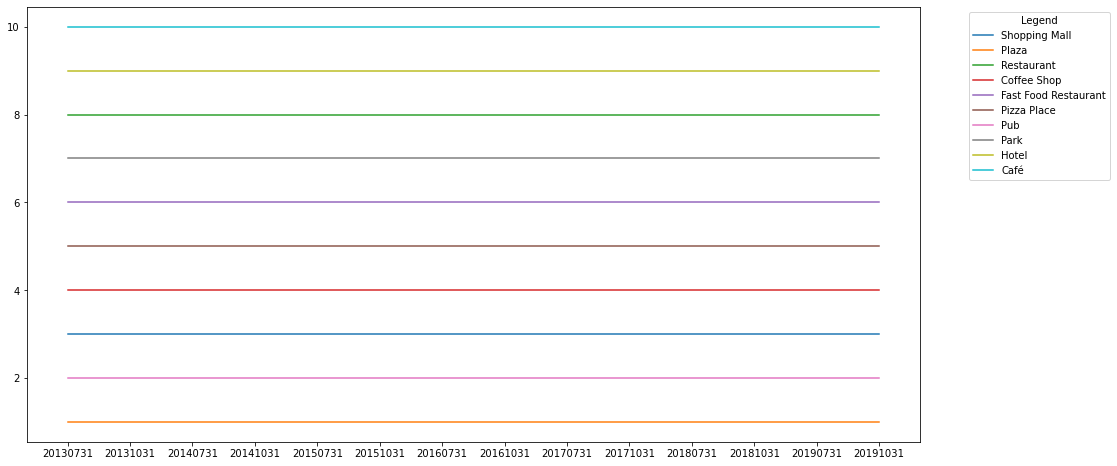

In [90]:
from matplotlib import pyplot as plt

plt.figure(figsize=(16,8))
for i in df_final.iloc[0:, :-1]:
    plt.plot(df_final.Date, df_final[i], label=i)

plt.legend(title='Legend', bbox_to_anchor=(1.05, 1))
plt.plot()

<br><br>
<p style="font-family: Arial; font-size:2em; padding=0em color:black; text-align: left">
    <em>
         3.2 Observation
    </em>
</p>
<br><br>

<p style="font-family: Arial; font-size:1.5em; padding=0.1em color:black; text-align: justify">
    <em>
        From above graph it can be noticed that the most popular venue is of type "Cafe"<br><br>
        Based on above data it looks like there is no change in "popularity" over time among Venue Types.
        Looks like "forsquare" database does not consist of the data from various periods of time for analysed region.
    </em>
</p>
<br></br>

<br><br>
<p style="font-family: Arial; font-size:2em; padding=0em color:black; text-align: left">
    <em>
         3.3 Finding the best location for the "most popular" Venue
    </em>
</p>
<br><br>

<p style="font-family: Arial; font-size:1.5em; padding=0.1em color:black; text-align: justify">
    <em>
        Now when we know what is the most popular Venue lets find its average distance form the city centre
    </em>
</p>
<br></br>

In [91]:
df_venue_optimize_location = df_cities_for_analysis_venues[['Venue Category', 'City Latitude',  'City Longitude', 'Venue Latitude', 'Venue Longitude']]
df_venue_optimize_location.iloc[0: 20000: 1000]

,Venue Category,City Latitude,City Longitude,Venue Latitude,Venue Longitude
0,Palace,52.2167,21.0333,52.214860,21.035599
1000,Park,50.8000,19.1167,50.834128,19.119971
2000,Breakfast Spot,53.4247,14.5553,53.431406,14.549465
3000,Bookstore,52.2167,21.0333,52.232870,21.002341
4000,Kebab Restaurant,51.4036,21.1567,51.403540,21.154256
5000,Gas Station,53.4247,14.5553,53.425522,14.499901
6000,Italian Restaurant,52.2167,21.0333,52.192363,21.003873
7000,History Museum,53.0167,18.6167,53.009844,18.604390
8000,Hotel,53.1167,18.0000,53.121343,18.005479
9000,Park,51.7769,19.4547,51.799857,19.448641


In [92]:
# Caffe
df_venue_optimize_location_caffe = df_venue_optimize_location[df_venue_optimize_location['Venue Category'] == 'Café']
print(df_venue_optimize_location_caffe.shape)
df_venue_optimize_location_caffe.head()

(1428, 5)


,Venue Category,City Latitude,City Longitude,Venue Latitude,Venue Longitude
28,Café,52.2167,21.0333,52.225629,21.019006
40,Café,52.2167,21.0333,52.236939,21.024575
45,Café,52.2167,21.0333,52.233204,21.010875
58,Café,52.2167,21.0333,52.239527,21.022618
63,Café,52.2167,21.0333,52.222851,20.988527


<p style="font-family: Arial; font-size:1.5em; padding=0.1em color:black; text-align: justify">
    <em>
        In order to calculate the distance between city centre and "Venue Category" the "Haversine" formula will be used.
    </em>
</p>
<br></br>

In [93]:
import math
import statistics

# Radius of the Earth in [m]
R = 6373.0 * 1000

distance_list = []
# Calculate distance for each Venue
for index, row in df_venue_optimize_location_caffe.iterrows():
    
    # coordinates
    city_lat = row['City Latitude']
    city_lng = row['City Longitude']
    venue_lat = row['Venue Latitude']
    venue_lng = row['Venue Longitude']
    
    # coordinates in radians
    lat1 = math.radians(city_lat)
    lng1 = math.radians(city_lng)
    lat2 = math.radians(venue_lat)
    lng2 = math.radians(venue_lng)
    
    # change in coordinates
    dlat = lat2 - lat1
    dlng = lng2 - lng1
    
    # Haversine formula
    a = math.sin(dlat / 2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlng / 2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    distance = R * c
    #print('distance: {}'.format(distance))
    distance_list.append(distance)
    

venue_loc_median = statistics.median(distance_list)
venue_loc_mean = statistics.mean(distance_list)
print('Median of the distance:\t{:.2f}'.format(venue_loc_median)) 
print('Mean of the distance:\t{:.2f}'.format(venue_loc_mean))

Median of the distance:	1417.21
Mean of the distance:	1537.89


<br><br>
<p style="font-family: Arial; font-size:2em; padding=0em color:black; text-align: left">
    <em>
         3.4 Printing the area of interenst over the "city_name"
    </em>
</p>
<br><br>

In [94]:
# create map of Toronto using latitude and longitude values
latitude_starting_zone = df_city_population.loc[df_city_population['city_ascii'] == city_name]['lat']
longitude_starting_zone = df_city_population.loc[df_city_population['city_ascii'] == city_name]['lng']
venue_best_location_map = folium.Map(location=[latitude_starting_zone, longitude_starting_zone], zoom_start=12)

# Best place for Venue Cafe highlited below
folium.Circle(
    [latitude_starting_zone, longitude_starting_zone],
    radius=venue_loc_median-100,
    color='red',
    fill=False,
    fill_opacity=1,
    ).add_to(venue_best_location_map)

    
venue_best_location_map

<br></br>
<p style="font-family: Arial; font-size:2.5em; padding=0em color:black; text-align: left">
    <strong>
         4. Conclusion
    </strong>
</p>

<p style="font-family: Arial; font-size:1.5em; padding=0.1em color:black; text-align: justify">
    <em>
        Based on the above analysis, it can be concluded, that the venue which we should invest in, is of type “Cafe". Its ideal location should be close to the city center.<br><br>
Please note that due to limited number od data included in foursquare database for the analysed cities, it wasn’t viable to check the trend in popularity over time, of different venues. Thus no regression was used in order to predict the best investment for the future!!!. 
    </em>
</p>
<br></br>